# Importing the Dataset and required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.drop(df.columns[[2,3,4]], axis = 1, inplace = True)
df.columns = ['target','messages']
df.head()

,target,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Preprocessing 

In [2]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
final = []
for i in range(len(df)):
    new = re.sub('[^a-zA-Z]',' ',df['messages'][i])
    new = new.lower()
    new = new.split()
    new = [wordnet.lemmatize(word) for word in new if not word in stopwords.words('english')] # List Comprehension
    new = ' '.join(new)
    final.append(new)

# Creating the TF-IDF model

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000) # take only top 5000 words
x = tfidf.fit_transform(final).toarray()
x.shape
y = pd.get_dummies(df['target'], drop_first = True)

# Performing Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2022)

# Creating the MNB classifier

In [5]:
from sklearn.naive_bayes import MultinomialNB
spam_detection = MultinomialNB().fit(x_train,y_train)
y_pred = spam_detection.predict(x_test)

C:\Users\goura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Confusion Matrix

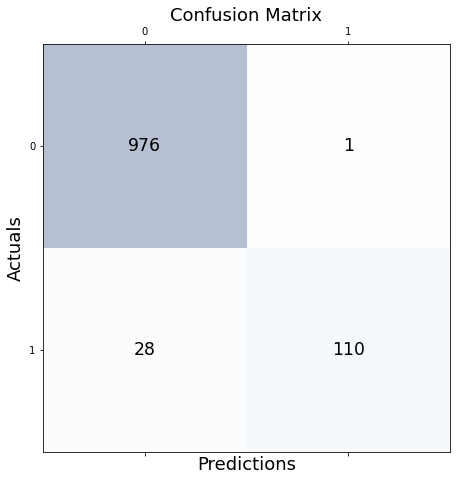

In [6]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(x=j, y=i,s=confusion[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Accuracy  

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(accuracy))

The accuracy score is 0.9739910313901345
